WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p_d]


Sampling 4 chains for 2_500 tune and 2_000 draw iterations (10_000 + 8_000 draws total) took 24 seconds.
The acceptance probability does not match the target. It is 0.6014155930150191, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8866693732035127, but should be close to 0.8. Try to increase the number of tuning steps.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
p_d,0.130,0.078,0.00,0.261,0.002,0.001,2069.0,1659.0,1.0
p_observed,0.315,0.039,0.25,0.380,0.001,0.001,2069.0,1659.0,1.0


<Figure size 1152x576 with 0 Axes>

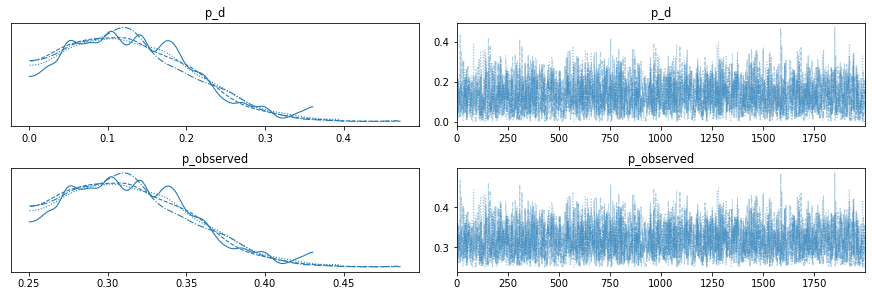

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019B94937D00>,
      dtype=object)

In [1]:
import pymc3 as pm
import arviz as az
import numpy as np
import matplotlib.pyplot as plt
import warnings
plt.figure(figsize=(16,8))
warnings.simplefilter(action="ignore", category=FutureWarning)

occurrences = np.concatenate((np.zeros(70), np.ones(30)))

with pm.Model() as model:
    p_d = pm.Uniform("p_d", 0, 1)
    p_observed= pm.Deterministic("p_observed", 0.25+0.5*p_d)
    answers = pm.Bernoulli("answers", p_observed, observed=occurrences)
    idata = pm.sample(2000, tune=2500)
    display(az.summary(idata))
az.plot_trace(idata, show=True)

In [2]:
import logging
#logger = logging.getLogger('pymc3')
#logger.setLevel(logging.ERROR)

m = pm.Model()
with m as model:
    for yes_answers in [30, 20, 10, 5]:
        print(f"Testing distribution with yes answers = {yes_answers}")
        occ = np.concatenate((np.zeros(100 - yes_answers), np.ones(yes_answers)))
        p = pm.Uniform(f"p_yes{yes_answers}", 0, 1)
        p_observed= pm.Deterministic(f"p_observed_yes{yes_answers}", 0.25 + 0.5*p)
        answers = pm.Bernoulli(f"answers_yes{yes_answers}", p_observed, observed=occ)
        
    idata = pm.sample(2000, tune=2500,return_inferencedata=True)

Testing distribution with yes answers = 30
Testing distribution with yes answers = 20
Testing distribution with yes answers = 10
Testing distribution with yes answers = 5


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p_yes5, p_yes10, p_yes20, p_yes30]


Sampling 4 chains for 2_500 tune and 2_000 draw iterations (10_000 + 8_000 draws total) took 99 seconds.


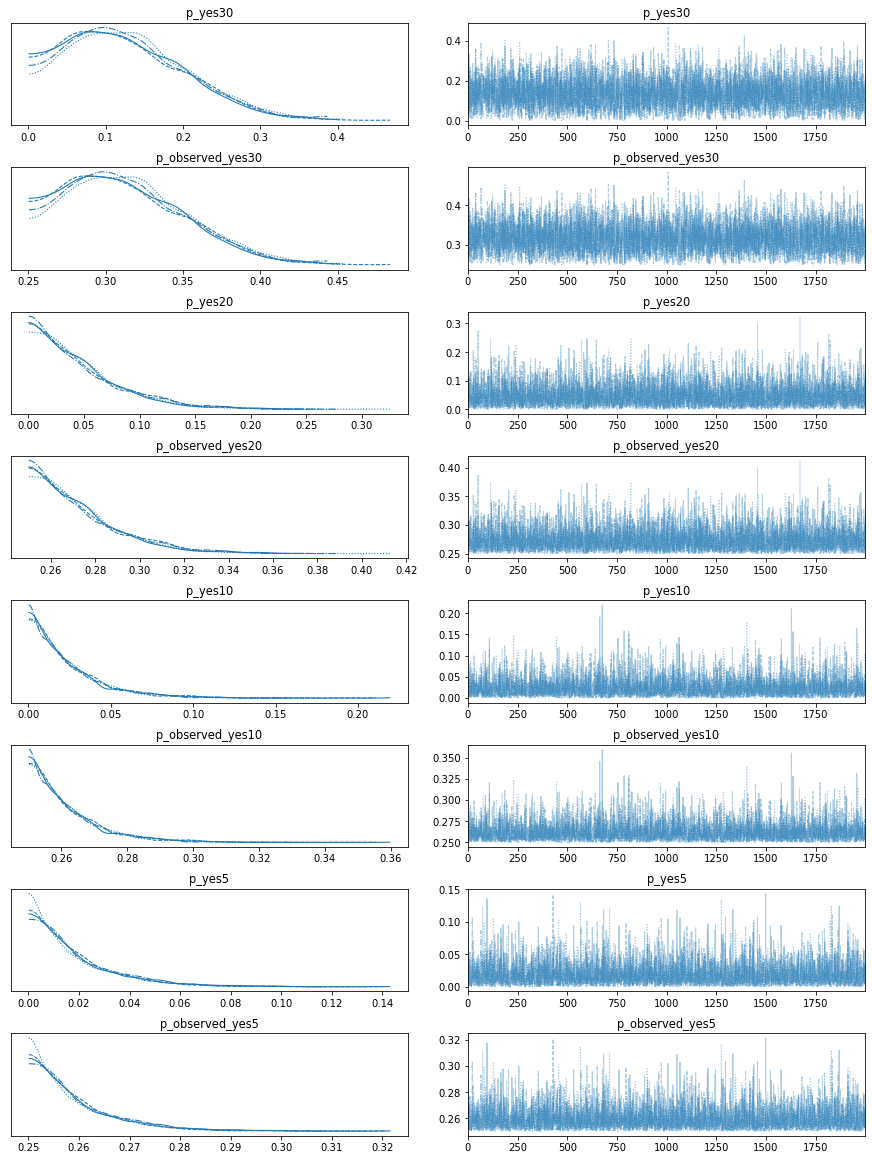

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
p_yes30,0.126,0.077,0.00,0.259,0.001,0.001,3461.0,2024.0,1.0
p_observed_yes30,0.313,0.038,0.25,0.379,0.001,0.000,3461.0,2024.0,1.0
p_yes20,0.046,0.040,0.00,0.119,0.001,0.000,3995.0,2675.0,1.0
p_observed_yes20,0.273,0.020,0.25,0.309,0.000,0.000,3995.0,2675.0,1.0
p_yes10,0.023,0.023,0.00,0.064,0.000,0.000,3136.0,1878.0,1.0
p_observed_yes10,0.262,0.011,0.25,0.282,0.000,0.000,3136.0,1878.0,1.0
p_yes5,0.018,0.018,0.00,0.050,0.000,0.000,4253.0,2813.0,1.0
p_observed_yes5,0.259,0.009,0.25,0.275,0.000,0.000,4253.0,2813.0,1.0


In [3]:

with m as model:
    axis = az.plot_trace(idata)
    plt.show()

with m as model:
    display(az.summary(idata))

## Excercise 1
In this excercise we reproduce the example from lecture for performing anonymous tests for drug usage. We are given the results from a survey in form of yes and no answers (`occurences`). Given the occurences, we are trying to observe the underlying distribution of drug probability, keeping in mind that the observed yes answer can come either from the true answer, or from a coin toss. 

We can see that for observed probabilities of 0.3, 0.2, 0.1 and 0.05 we can deduce the true probability of drugs to be around 0.13, 0.05, 0.025, 0.018. However, we can observe that even though the number occurences drops down to 5%, the observed p_observed probability does not follow. It is due to the fact that the formula $p_{obs} = 0.25 + 0.5* p_d$ can only go as low as 0.25 for $p_d = 0$. We can observe that for 5% the peak of the distribution approaches the 0.25 limit.

By adding the random element to the trial we can still backtrack the underlying result, while providing anonymity and protection for the respondees.

Probability of student taking drugs: 0.1. Sample answers: 34 yes, 66 no
Probability of student taking drugs: 0.5. Sample answers: 55 yes, 45 no
Probability of student taking drugs: 0.9. Sample answers: 71 yes, 29 no


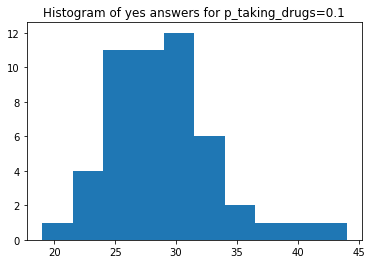

Probability of student taking drugs: 0.1. Final result: 1427 yes (0.2854%), 3573 no (0.7146%)


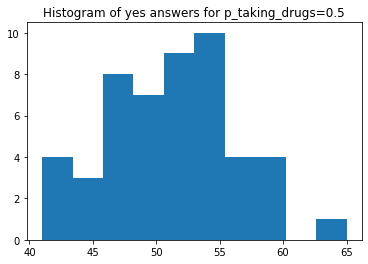

Probability of student taking drugs: 0.5. Final result: 2551 yes (0.5102%), 2449 no (0.4898%)


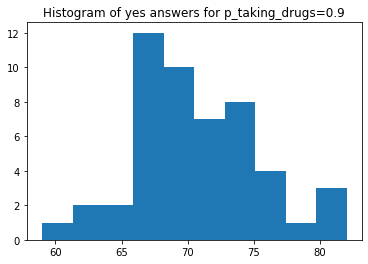

Probability of student taking drugs: 0.9. Final result: 3533 yes (0.7066%), 1467 no (0.2934%)


In [4]:
import scipy.stats as st


for p_taking_drugs in [0.1, 0.5, 0.9]:
    p_observed_answers = 0.25 + 0.5 * p_taking_drugs
    ans = st.bernoulli.rvs(p_observed_answers, size=100)
    print(f'Probability of student taking drugs: {p_taking_drugs}. Sample answers: {len(ans[ans == 1])} yes, {len(ans[ans == 0])} no')

for p_taking_drugs in [0.1, 0.5, 0.9]:
    p_observed_answers = 0.25 + 0.5 * p_taking_drugs
    results = []
    yes_counts = []
    no_counts = []
    for s in range(50):
        ans = st.bernoulli.rvs(p_observed_answers, size=100)
        results.extend(ans)
        yes_counts.append(len(ans[ans == 1]))
        no_counts.append(len(ans[ans == 0]))
    results = np.array(results)
    yes_counts = np.array(yes_counts)
    no_counts = np.array(no_counts)
    plt.hist(yes_counts, bins=10)
    plt.title(f'Histogram of yes answers for p_taking_drugs={p_taking_drugs}')
    plt.show()
    print(f'Probability of student taking drugs: {p_taking_drugs}. Final result: {len(results[results == 1])} yes ({len(results[results == 1])/(100 * 50)}%), {len(results[results == 0])} no ({len(results[results == 0])/(100 * 50)}%)')

## Excercise 2
By simulating the random draws from n=50 questionnaires we can observe the histogram of yes answers. For p_taking_drugs = 0.1, we can see that p_observed_answers = 0.25 + 0.5 * 0.1 = 0.3 which can be seen from the histogram. For p = 0.5, the underlying p_observed follows the similar distribution with p_observed = 0.5. For p_taking_drugs = 0.9, the p_observed diminishes the result,